In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor

In [27]:
X1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_4\initial_inputs.npy')
Y1 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data\function_4\initial_outputs.npy')
X2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_4\initial_inputs.npy')
Y2 = np.load(r'C:\Users\xdb13122\Desktop\ML Course\capstone project\initial_data2\function_4\initial_outputs.npy')
X = np.concatenate((X1, X2), axis=0)
Y = np.concatenate((Y1, Y2), axis=0)

In [28]:
X

array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226,

In [29]:
new_row = np.array([[0.029165, 0.887765, 0.395183, 0.91517], [0.136121, 0.20395 , 0.536603, 0.787886], [0.454442, 0.897027, 0.190592, 0.764176],[0.454442, 0.897027, 0.190592, 0.764176], [0.461839, 0.761866, 0.320921, 0.771822], [0.88225 , 0.88213 , 0.459067, 0.123382]])
X = np.concatenate((X, new_row), axis=0)

In [30]:
X

array([[0.89698105, 0.72562797, 0.17540431, 0.70169437],
       [0.8893564 , 0.49958786, 0.53926886, 0.50878344],
       [0.25094624, 0.03369313, 0.14538002, 0.49493242],
       [0.34696206, 0.0062504 , 0.76056361, 0.61302356],
       [0.12487118, 0.12977019, 0.38440048, 0.2870761 ],
       [0.80130271, 0.50023109, 0.70664456, 0.19510284],
       [0.24770826, 0.06044543, 0.04218635, 0.44132425],
       [0.74670224, 0.7570915 , 0.36935306, 0.20656628],
       [0.40066503, 0.07257425, 0.88676825, 0.24384229],
       [0.6260706 , 0.58675126, 0.43880578, 0.77885769],
       [0.95713529, 0.59764438, 0.76611385, 0.77620991],
       [0.73281243, 0.14524998, 0.47681272, 0.13336573],
       [0.65511548, 0.07239183, 0.68715175, 0.08151656],
       [0.21973443, 0.83203134, 0.48286416, 0.08256923],
       [0.48859419, 0.2119651 , 0.93917791, 0.37619173],
       [0.16713049, 0.87655456, 0.21723954, 0.95980098],
       [0.21691119, 0.16608583, 0.24137226, 0.77006248],
       [0.38748784, 0.80453226,

In [31]:
Y

array([-22.10828779, -14.60139663, -11.69993246, -16.05376511,
       -10.06963343, -15.48708254, -12.68168498, -16.02639977,
       -17.04923465, -12.74176599, -27.31639636, -13.52764887,
       -16.6791152 , -16.50715856, -17.81799934, -26.56182083,
       -12.75832422, -19.44155762, -28.90327367, -13.70274694,
       -29.4270914 , -11.56574199, -26.85778644,  -7.96677535,
        -6.70208925, -32.62566022, -19.98949793,  -4.02554228,
       -13.12278233, -23.1394284 , -11.16951981, -16.32449028,
       -31.38445908, -27.29480064, -23.85565426, -14.15687958,
       -26.74975128, -15.19992034,  -9.16936028, -13.46226594,
        -6.41942649, -16.80062213,  -4.27992993, -16.2096673 ,
       -24.63877878,  -7.10203834, -14.13627283, -29.29068304,
       -16.18758003, -16.06647852, -10.06590767, -15.76404381,
       -17.22808929, -17.8193119 , -17.00261119, -20.43074735,
       -16.34614616, -21.13430564, -18.75674243, -25.21448142])

In [32]:
new_row = np.array([-27.702167593339002,  -14.106308541263171, -20.092643282061697, -20.092643282061697, -15.125127865230699, -23.97060177721391])
Y = np.concatenate((Y, new_row), axis=0)

In [33]:
Y

array([-22.10828779, -14.60139663, -11.69993246, -16.05376511,
       -10.06963343, -15.48708254, -12.68168498, -16.02639977,
       -17.04923465, -12.74176599, -27.31639636, -13.52764887,
       -16.6791152 , -16.50715856, -17.81799934, -26.56182083,
       -12.75832422, -19.44155762, -28.90327367, -13.70274694,
       -29.4270914 , -11.56574199, -26.85778644,  -7.96677535,
        -6.70208925, -32.62566022, -19.98949793,  -4.02554228,
       -13.12278233, -23.1394284 , -11.16951981, -16.32449028,
       -31.38445908, -27.29480064, -23.85565426, -14.15687958,
       -26.74975128, -15.19992034,  -9.16936028, -13.46226594,
        -6.41942649, -16.80062213,  -4.27992993, -16.2096673 ,
       -24.63877878,  -7.10203834, -14.13627283, -29.29068304,
       -16.18758003, -16.06647852, -10.06590767, -15.76404381,
       -17.22808929, -17.8193119 , -17.00261119, -20.43074735,
       -16.34614616, -21.13430564, -18.75674243, -25.21448142,
       -27.70216759, -14.10630854, -20.09264328, -20.09

Optimal hyperparameters: [0.41478272717053344, 0.32726099877904913, 0.4380057341771842, 0.3954971366390889]
Predicted value of the objective function for optimal hyperparameters: -0.3780332026362885


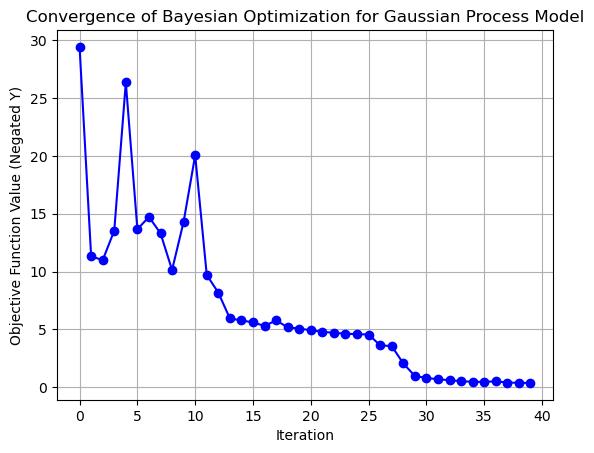

In [34]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt

# Define the input data (hyperparameters) and output data (model differences)
X = X
Y = Y

# Step 1: Define and fit the Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp.fit(X, Y)

# Step 2: Define the objective function for Bayesian optimization
def objective_function(params):
    params = np.array(params).reshape(1, -1)  # Reshape to fit model input shape
    y_pred = gp.predict(params)[0]  # Predict using GP model
    return -y_pred  # Negate to maximize (since we're minimizing in Bayesian opt)

# Step 3: Define the search space for the four hyperparameters
space = [
    Real(0, 1, name='x1'),
    Real(0, 1, name='x2'),
    Real(0, 1, name='x3'),
    Real(0, 1, name='x4')
]

# Step 4: Run Bayesian Optimization
result = gp_minimize(objective_function, space, n_calls=40, random_state=0)

# Extract optimal values of hyperparameters and their associated objective function value
optimal_x = result.x
optimal_y = -result.fun  # Since we negated for maximization

print("Optimal hyperparameters:", optimal_x)
print("Predicted value of the objective function for optimal hyperparameters:", optimal_y)

# Plot convergence
plt.plot(result.func_vals, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value (Negated Y)")
plt.title("Convergence of Bayesian Optimization for Gaussian Process Model")
plt.grid(True)
plt.show()

Optimal hyperparameters: [0.38682248 0.38603614 0.39025974 0.39165705]
Predicted maximum output (Y) for optimal hyperparameters: -3.7531186317967276


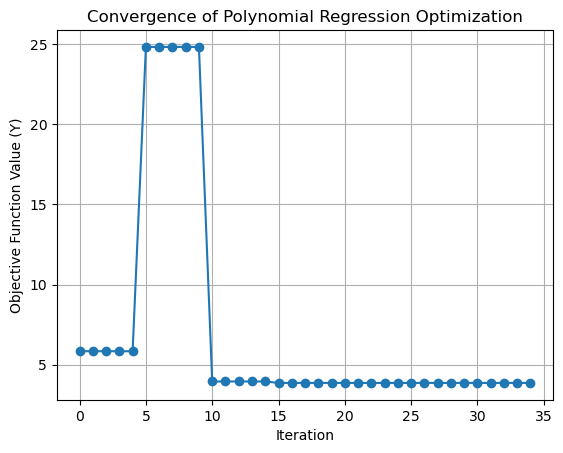

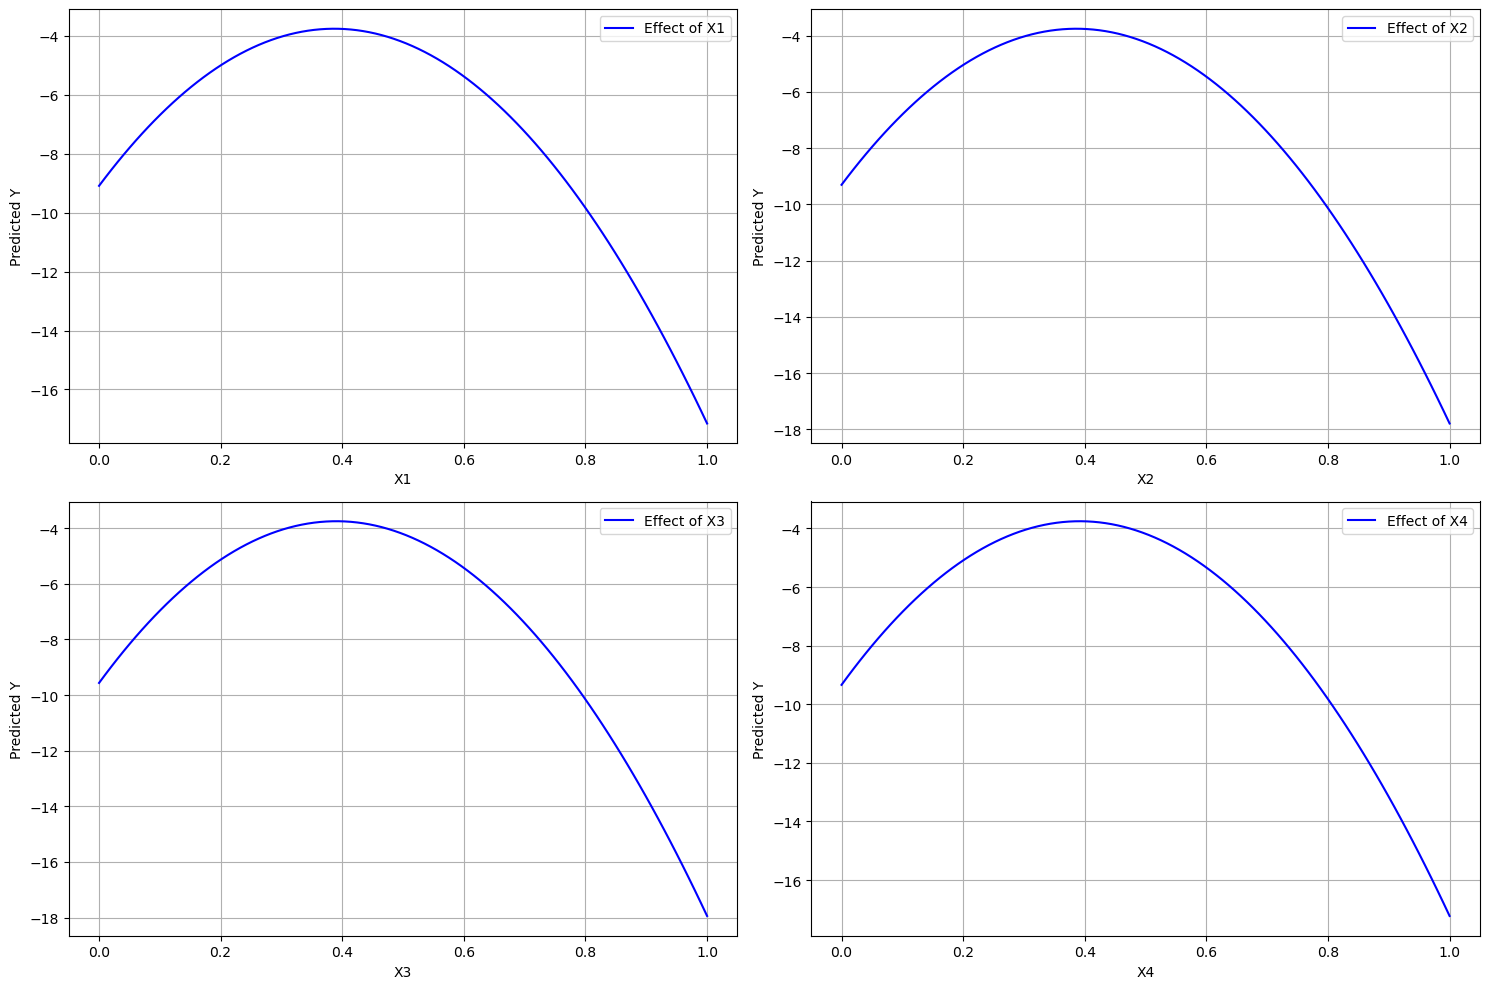

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from scipy.optimize import minimize
import seaborn as sns

# Data
X = X
Y = Y

# Step 1: Fit a Polynomial Regression Model
degree = 2  # Degree of polynomial features
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, Y)

# Step 2: Define the objective function for maximization
def objective(params):
    params = np.array(params).reshape(1, -1)
    return -model.predict(params)[0]  # Negate for maximization

# Step 3: Optimization to find the maximum
initial_guess = np.mean(X, axis=0)
result = minimize(objective, initial_guess, bounds=[(0, 1)]*4)

optimal_x = result.x
optimal_y = -result.fun

print("Optimal hyperparameters:", optimal_x)
print("Predicted maximum output (Y) for optimal hyperparameters:", optimal_y)

# Step 4: Plot Convergence
plt.plot(convergence, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value (Y)")
plt.title("Convergence of Polynomial Regression Optimization")
plt.grid(True)
plt.show()

# Step 4: Visualize the effect of each variable on Y

# Create partial dependence plots for each input variable
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    x_range = np.linspace(0, 1, 100)
    X_pred = np.tile(optimal_x, (100, 1))
    X_pred[:, i] = x_range  # Vary only one feature at a time
    y_pred = model.predict(X_pred)
    ax.plot(x_range, y_pred, label=f'Effect of X{i+1}', color='b')
    ax.set_xlabel(f'X{i+1}')
    ax.set_ylabel('Predicted Y')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()